In [52]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

In [53]:
df=pd.read_csv('heart.csv')

## Pre-Processing :

In [54]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Feature Descriptions
- `age`: Age of the patient in years.

- `sex`: The gender of the patient.
    1: Male
    0: Female

- `cp (Chest Pain Type)`: The type of chest pain experienced by the patient.

    0: Typical Angina(chest pain related to decreased blood supply to the heart)

    1: Atypical Angina` (chest pain not typical for heart-related issues)

    2: Non-anginal Pain (typically esophageal spasms or non-heart related pain)

    3: Asymptomatic (no symptoms of chest pain)

---

- `trestbps (Resting Blood Pressure):` The patient's resting blood pressure in millimeters of mercury (mm Hg) upon admission to the hospital.

- `chol (Serum Cholesterol): `The patient's serum cholesterol level in milligrams per deciliter (mg/dl).

- `fbs (Fasting Blood Sugar):` The patient's fasting blood sugar level.

    1: > 120 mg/dl (True)

    0: <= 120 mg/dl (False)

---

- `restecg (Resting Electrocardiographic Results):` Results of the resting electrocardiogram (ECG).

    0: Normal

    1: Having ST-T wave abnormality (can range from minor changes to definite signs of heart problems)

    2: Showing probable or definite left ventricular hypertrophy (enlargement of the heart's main pumping chamber)

- `thalach (Maximum Heart Rate Achieved):` The maximum heart rate achieved by the patient during a stress test.

- `exang (Exercise Induced Angina):` Whether the patient experienced angina (chest pain) during exercise.

    1: Yes

    0: No
---
- `oldpeak:` ST depression induced by exercise relative to rest. This measures the difference in the ST segment of an ECG during exercise compared to rest.

- `slope:` The slope of the peak exercise ST segment on the ECG.

    0: Upsloping

    1: Flat

    2: Downsloping

- `ca:` Number of major vessels (0-3) colored by fluoroscopy. This indicates the number of major coronary arteries that are blocked.
---
- `thal (Thalassemia):` A blood disorder called thalassemia.

    1: Fixed defect (no blood flow in some part of the heart)

    2: Normal blood flow

    3: Reversible defect (blood flow is observed but is not normal)

---
- `target: `The variable you are trying to predict.

    1: The patient has heart disease.

    0: The patient does not have heart disease.

In [55]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [56]:
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)  # One-hot Encoding

# Convert boolean columns to integers (0s and 1s)
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'bool':
        df_encoded[col] = df_encoded[col].astype(int)


In [57]:
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

df_encoded.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


## EDA :

In [58]:
import warnings
warnings.filterwarnings('ignore')

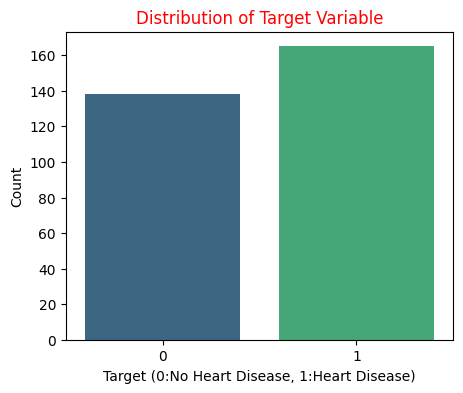

In [59]:
# Distribution of target variable
plt.figure(figsize=(5, 4))
sns.countplot(x='target', data=df,palette='viridis')
plt.title('Distribution of Target Variable',color='red')
plt.xlabel('Target (0:No Heart Disease, 1:Heart Disease)')
plt.ylabel('Count')
plt.show()


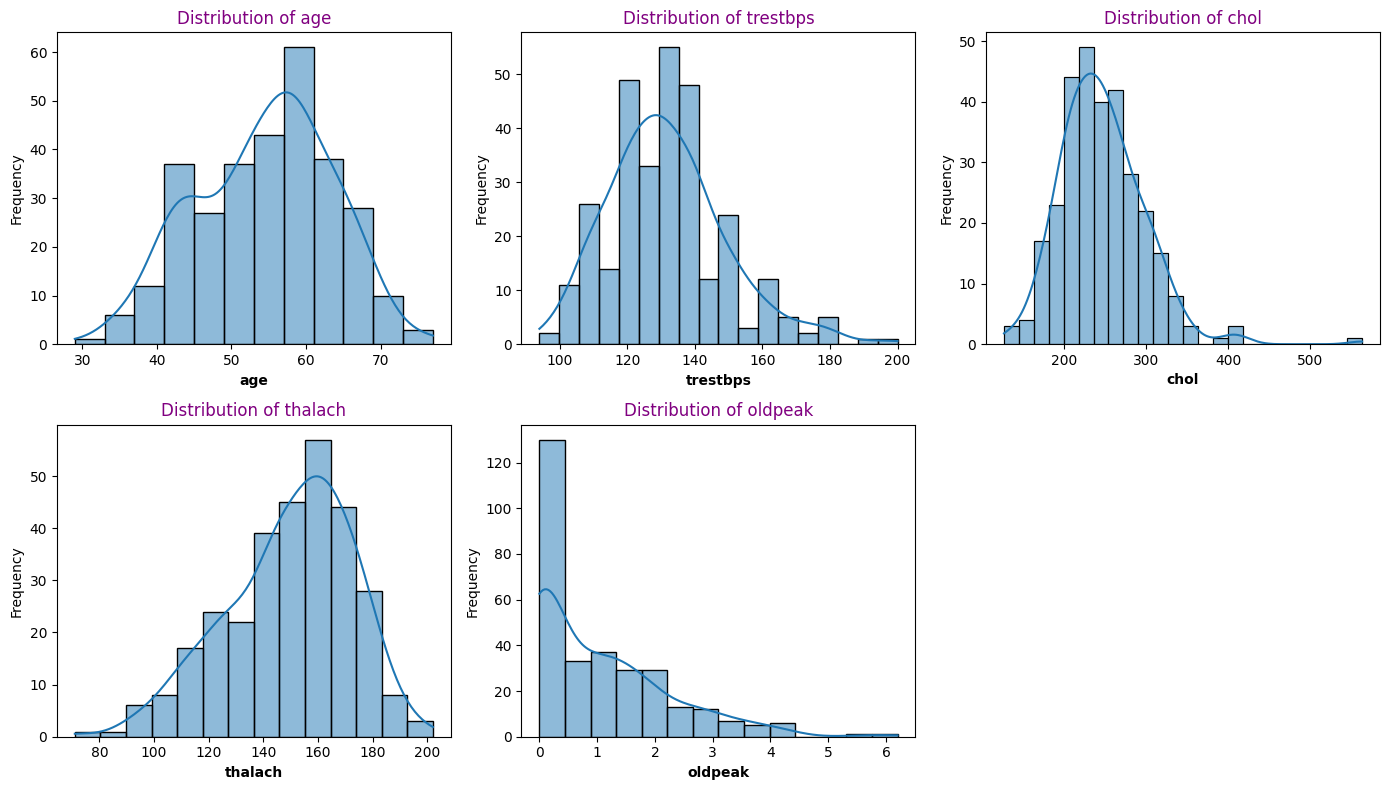

In [61]:
# Create a figure with a 2x3 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 8))

# Flatten the axes array to easily iterate over it
axes = axes.flatten()

# Generate a histogram for each numerical feature on a separate subplot
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}',color='purple')
    axes[i].set_xlabel(col,fontweight='bold')
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
if len(numerical_cols) < len(axes):
    for i in range(len(numerical_cols), len(axes)):
        fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


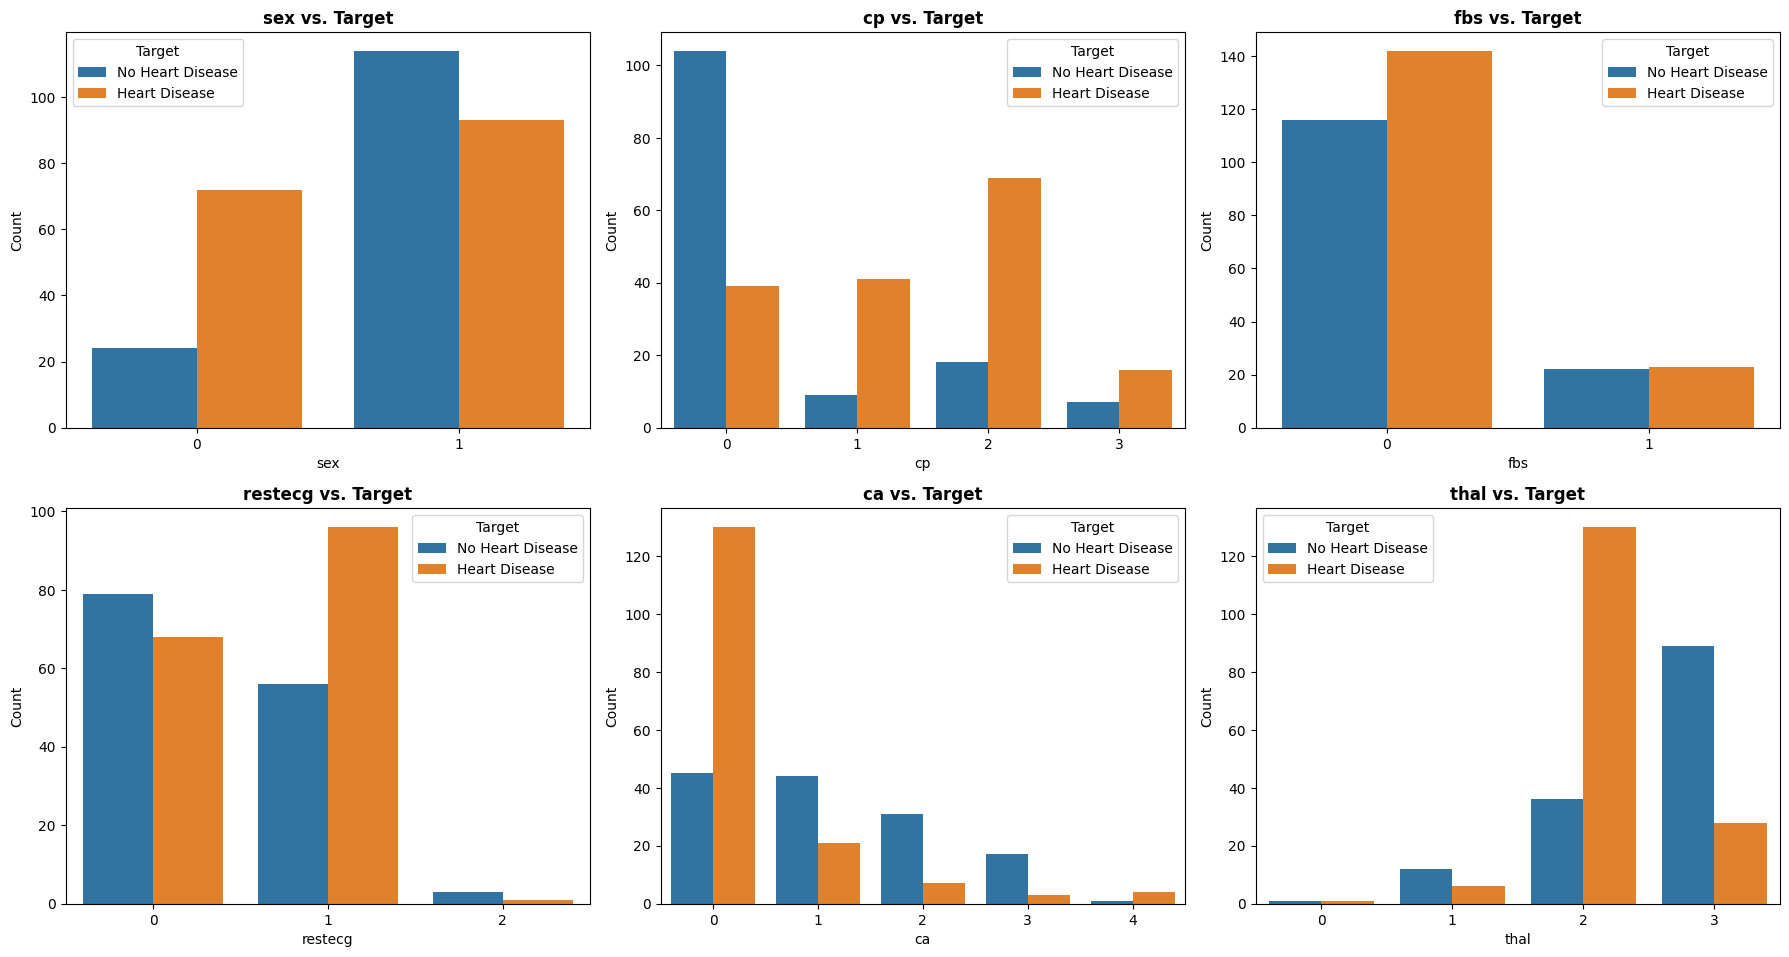

In [62]:
# Define the categorical columns to be plotted
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'ca', 'thal']

# Create a figure with a 3x3 grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 14))

# Flatten the axes array to easily iterate over it
axes = axes.flatten()

# Generate a countplot for each categorical feature on a separate subplot
for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, hue='target', data=df, ax=axes[i])
    axes[i].set_title(f'{col} vs. Target',fontweight='bold')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Target', labels=['No Heart Disease', 'Heart Disease'])

# Hide any unused subplots
if len(categorical_cols) < len(axes):
    for i in range(len(categorical_cols), len(axes)):
        fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


## Model Building :

In [63]:
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (227, 22)
Shape of X_test: (76, 22)
Shape of y_train: (227,)
Shape of y_test: (76,)


In [64]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [65]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test,y_pred))

Accuracy: 0.8816
              precision    recall  f1-score   support

           0       0.88      0.86      0.87        35
           1       0.88      0.90      0.89        41

    accuracy                           0.88        76
   macro avg       0.88      0.88      0.88        76
weighted avg       0.88      0.88      0.88        76



In [66]:
print(f"Number of mislabeled points out of a total {X_test.shape[0]} points :{(y_test != y_pred).sum()}")

Number of mislabeled points out of a total 76 points :9


In [ ]:
# Select the most important numerical features for a user-friendly prediction model
feature_names_pred = ['thalach', 'oldpeak', 'age', 'chol']
X_pred = df[feature_names_pred]
y_pred_target = df['target']

# Scale the features for the prediction model
# A new scaler is used to fit only on the selected features
scaler_pred = StandardScaler()
X_pred_scaled = scaler_pred.fit_transform(X_pred)

# Train the prediction model on the entire dataset with selected features
model_pred = LogisticRegression(random_state=42)
model_pred.fit(X_pred_scaled, y_pred_target)

# Get user input
print("\n\n--- Interactive Heart Disease Prediction ---")
print("Enter the following values to predict the likelihood of heart disease.")
user_input = []

for feature in feature_names_pred:
    while True:
        try:
            val = float(input(f"Enter {feature} value: "))
            user_input.append(val)
            break
        except ValueError:
            print("Invalid input. Please enter a numerical value.")

# Convert the user input to a NumPy array and reshape it
user_data = np.array(user_input).reshape(1, -1)

# Scale the user's input using the same scaler fitted on the prediction data
user_data_scaled = scaler_pred.transform(user_data)

# Make the prediction
prediction = model_pred.predict(user_data_scaled)
prediction_proba = model_pred.predict_proba(user_data_scaled)

# Display the result
print("\n--- Prediction Result ---")
if prediction[0] == 1:
    print(f"👉 Outcome: {prediction[0]}")
    print("The model predicts: Heart Disease Positive ✅")
    print(f"Confidence: {prediction_proba[0][1]*100:.2f}%")
else:
    print(f"👉 Outcome: {prediction[0]}")
    print("The model predicts: Heart Disease Negative ❌")
    print(f"Confidence: {prediction_proba[0][0]*100:.2f}%")



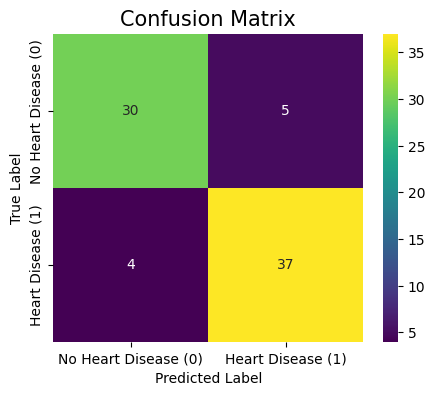

In [68]:
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis',
            xticklabels=['No Heart Disease (0)', 'Heart Disease (1)'],
            yticklabels=['No Heart Disease (0)', 'Heart Disease (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix', fontsize=15)
plt.show()